### Seaborn plotting

How does seaborn work and how can you manipulate it to get the best plots?

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

#### Seaborn basics  
How do you produce a plot?

Numpy is the python library for handling maths.  
Matplotlib is a python library built on Numpy which draws plots.  
Seaborn is a python library built on Numpy, pandas and matllibplot which draws beautiful, customisable plots.  

There is LOTS of online help in making your seaborn plots exactly how you want them:  

    https://seaborn.pydata.org/introduction.html

#### Matplotlib

Matplot is the python library for plotting.  It plots data on *Axes* in a *Figure*.  For our purposes the *Figure* is a jupyter notebook cell and the *Axes* is the graph.


In [ ]:
https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

Here's the anatomy of a matplotlib figure

![title](Parts_of_plot.webp)

All of these features can be controled

Make up some data to plot

In [23]:
data = np.ones(100)
data[70:] -= np.arange(30)

In [198]:
data

array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   0.,  -1.,  -2.,  -3.,  -4.,  -5.,
        -6.,  -7.,  -8.,  -9., -10., -11., -12., -13., -14., -15., -16.,
       -17., -18., -19., -20., -21., -22., -23., -24., -25., -26., -27.,
       -28.])

Define a figure space, put in some axes, plot the data on these axes

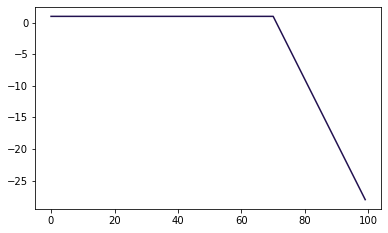

In [25]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.plot(data)

Modify the plot to set x and y limits and remove tick labels

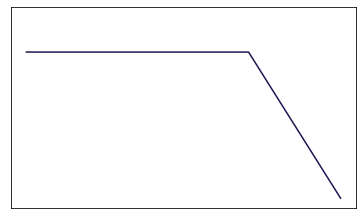

In [26]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.set_ylim([-30, 10])
ax.set_xticks([])
ax.set_yticks([])
ax.plot(data)


Change the size of the plot (default is inches)

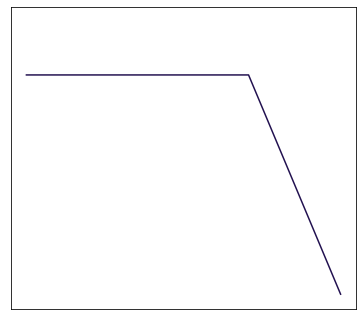

In [27]:
fig.set_size_inches(6, 6)
fig

Using cm instead via defining the conversion

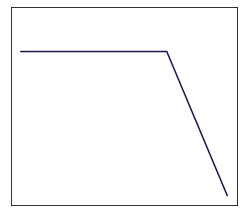

In [28]:
cm = 1/2.54
fig.set_size_inches(10*cm, 10*cm) 
fig

Text(0.5, 0.05, '"Stove Ownership" from xkcd by Randall Munroe')

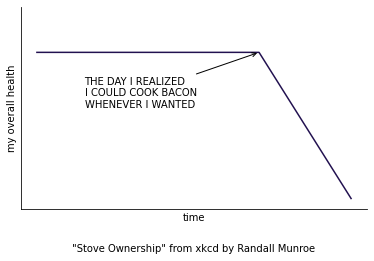

In [30]:
#define a figure
fig = plt.figure()
#add axes at set distances from the edges of the space
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
#colour two of the axes to none to remove them
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')
# add ticks to the axes
ax.set_xticks([])
ax.set_yticks([])
#set the y axis limits
ax.set_ylim([-30, 10])
#add a lable on the figure
ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))
#plot the data
ax.plot(data)
#labl the axes
ax.set_xlabel('time')
ax.set_ylabel('my overall health')
#add a title
fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

We can apply an overall style to the plot

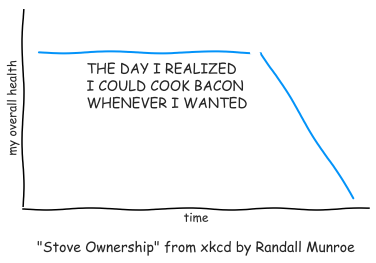

In [217]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines.right.set_color('none')
    ax.spines.top.set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

Save to file

In [218]:
fig.savefig('bacon.png', dpi=100)

Seaborn is a library of styles which, like the 'xkcd' style here, works over Matplotlib.  Here we use a standard seaborn graph style (you will likely have seen this many times).

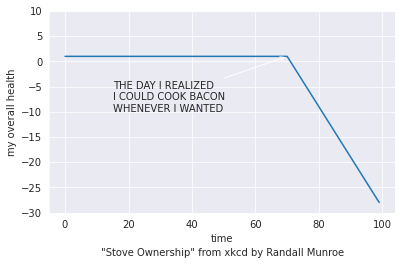

In [20]:
with sns.axes_style("darkgrid"):
    
    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)
    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

Not as good as a cartoon, but maybe better for publications?

But seaborn does much more than just a default style.  It makes it easy to plot a whole range of graphs to explore your dataset.  Here's some data 

### Seaborn plot types

We'll look at some seaborn plots using a data set of floral organ lengths for 3 species of Iris from three habitats.  This data set has categorical data (species, site) and numerical site (the lengths).

In [131]:
! wget https://github.com/ckidner/PS4_data_analysis/raw/master/Iris.txt

--2022-07-13 13:39:26--  https://github.com/ckidner/PS4_data_analysis/raw/master/Iris.txt
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ckidner/PS4_data_analysis/master/Iris.txt [following]
--2022-07-13 13:39:27--  https://raw.githubusercontent.com/ckidner/PS4_data_analysis/master/Iris.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4770 (4.7K) [text/plain]
Saving to: ‘Iris.txt’

Iris.txt            100%[===================>]   4.66K  --.-KB/s    in 0s      

2022-07-13 13:39:27 (9.50 MB/s) - ‘Iris.txt’ saved [4770/4770]



In [2]:
df=pd.read_table("Iris.txt")

In [133]:
df.head(3)

sepal_length  sepal_width  petal_length  petal_width     Species   Site
0           5.0          2.0           3.5          1.0  versicolor  Field
1           6.0          2.2           5.0          1.5   virginica  Field
2           5.5          2.3           4.0          1.3  versicolor  Field

Seaborn makes it easy to switch between different plot types, generating distribution plots by quantitiative or categorical datatypes, examine the realtionships between variation and combine these appraoches 

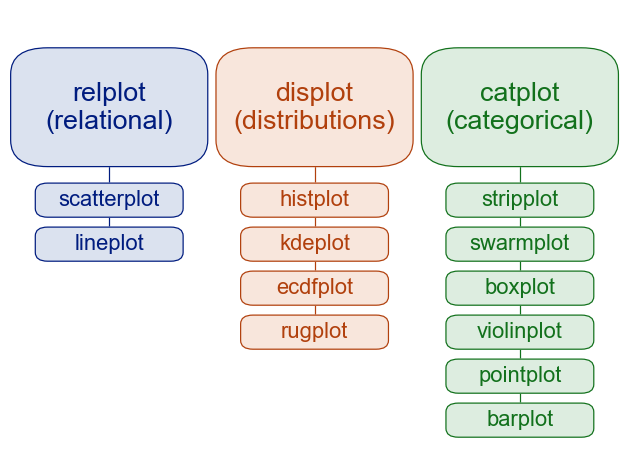

### Data distribution. displot
Shows the distribution of numerical data.

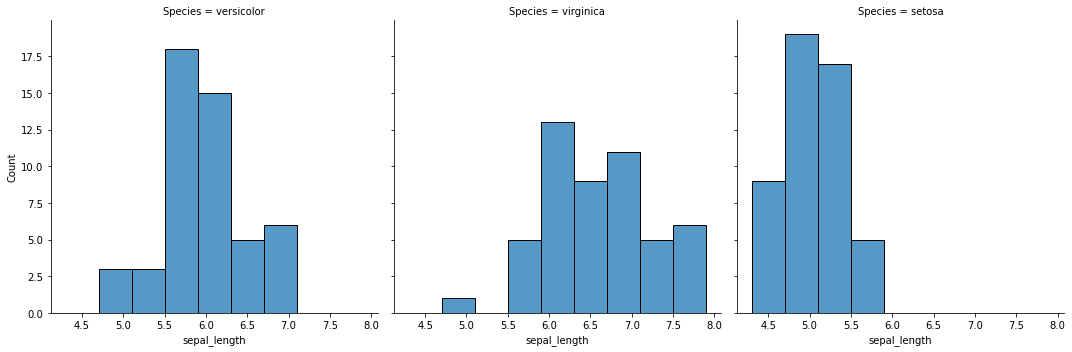

In [137]:
sns.displot(data=df, x="sepal_length", col="Species", kde=False)

We can get fancier, adding in categorical information by colouring by site and showing the continuous distribuiton of the data with kernel density plotting.

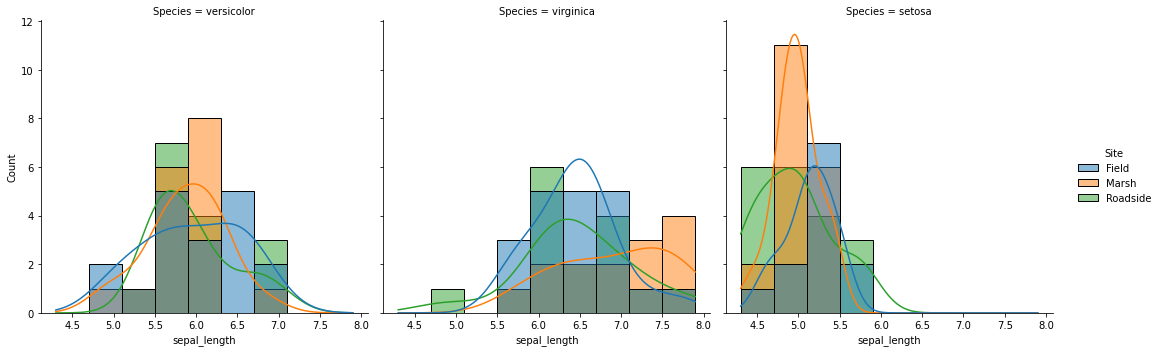

In [138]:
sns.displot(data=df, x="sepal_length", col="Species", hue = "Site", kde=True)

Or the other way round...

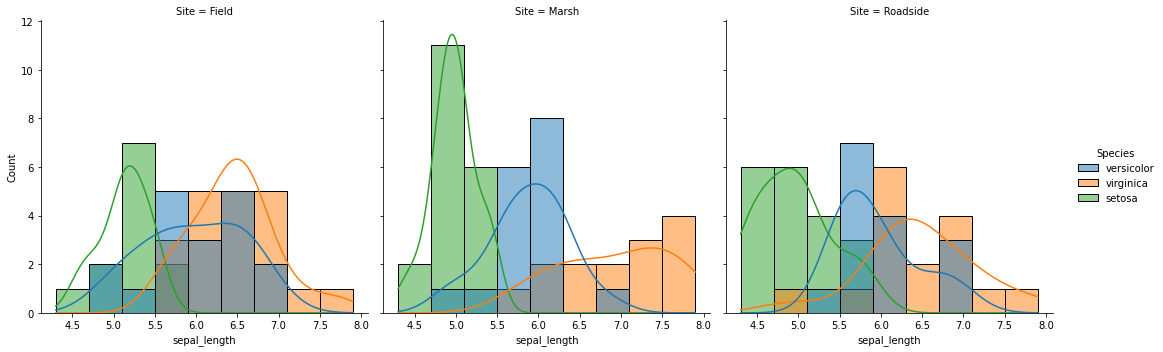

In [139]:
sns.displot(data=df, x="sepal_length", col="Site", hue = "Species", kde=True)

### Categorical data. catplot
We can focus on the categorical dimension, making that the x axis adn platting all the data points in a scatter plot along the y axis.  Colouring by site allows us toe present all the data.


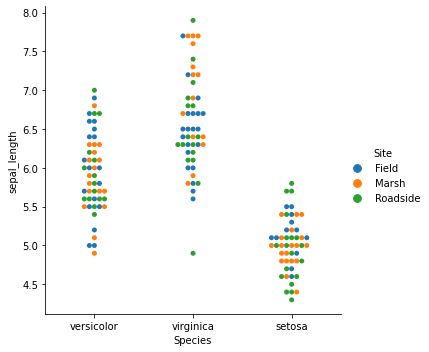

In [141]:
sns.catplot(data=df, kind="swarm", x="Species", y="sepal_length", hue="Site")

This is maybe too noisy to be able to see patterns.  We cam simplfy things to focus on difference beteen catagories.  Comparing Marsh and roadside in a split violin plot.

In [148]:
df2 = df[df.Site != "Field"]
sns.catplot(data=df2, kind="violin", x="Species", y="sepal_length", hue="Site", split=True)

Compare Marsh and Field

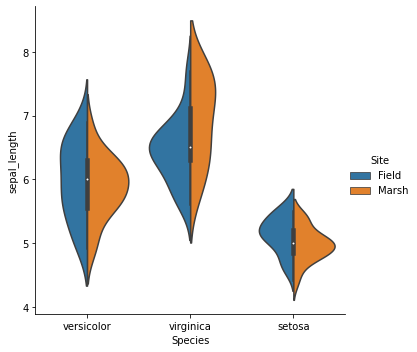

In [151]:
df2 = df[df.Site != "Roadside"]
sns.catplot(data=df2, kind="violin", x="Species", y="sepal_length", hue="Site", split=True)

Seaborn also using basic stats to present categorical data.  We can use means, median and confidence intervals, sd or SE.

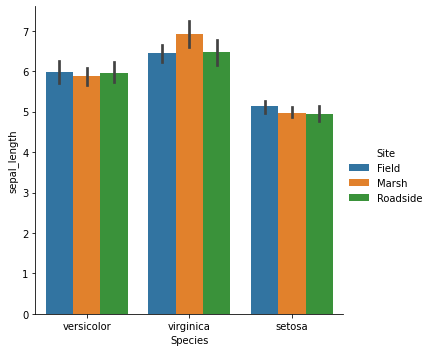

In [153]:
sns.catplot(data=df, kind="bar", x="Species", y="sepal_length", hue="Site")

Can show median and SE instead

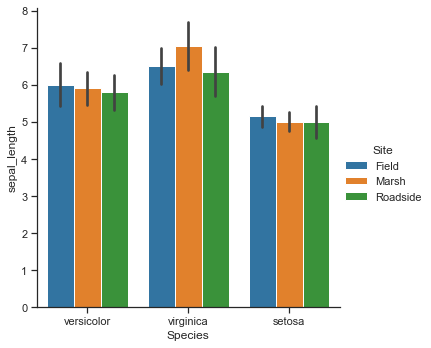

In [222]:
from numpy import median
sns.catplot(data=df, kind="bar", x="Species", y="sepal_length", hue="Site", estimator=median, ci="sd")

### relationships. 
To show the relationship between two numberical values we can use relplot

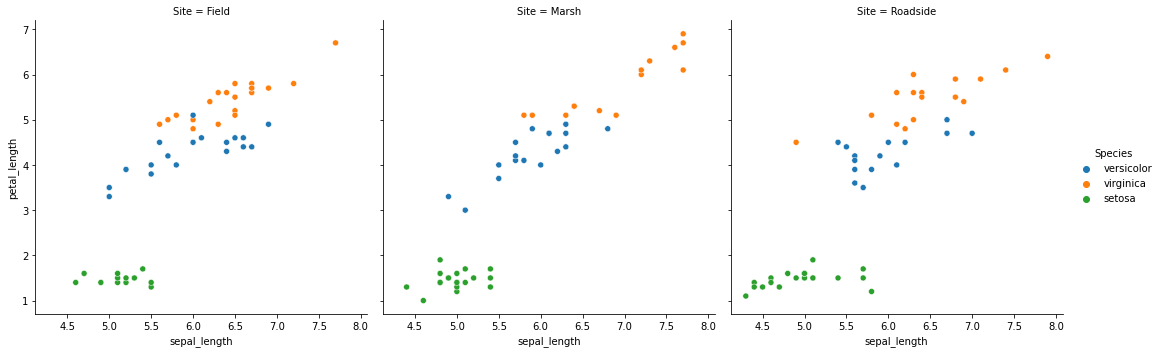

In [155]:
sns.relplot(
    data=df,
    x="sepal_length", y="petal_length", col="Site",
    hue="Species")

In [ ]:
These can have linear regression lines added, along with confidence boundaries.

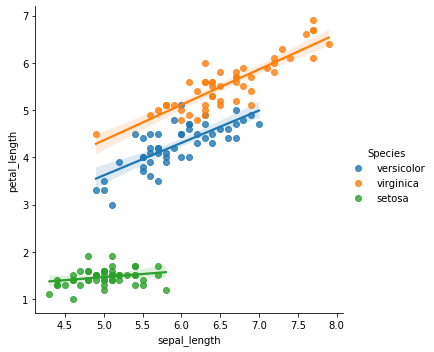

In [156]:
sns.lmplot(data=df, x="sepal_length", y="petal_length", hue="Species")

Separate out the species

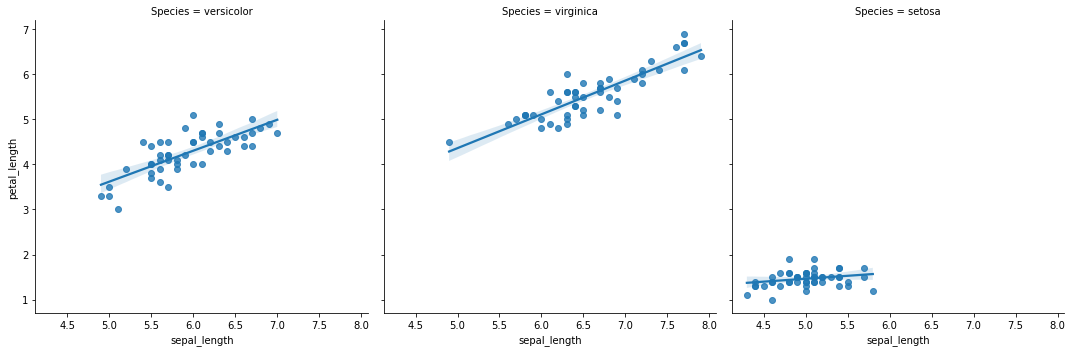

In [157]:
sns.lmplot(data=df, x="sepal_length", y="petal_length", col="Species")

### Other plot types

#### We can plot categorical data against each other using heatmaps.

In [ ]:
# calculate the correlation matrix for floral organ lengths
corr = df.corr()

In [5]:
corr

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

<AxesSubplot:>

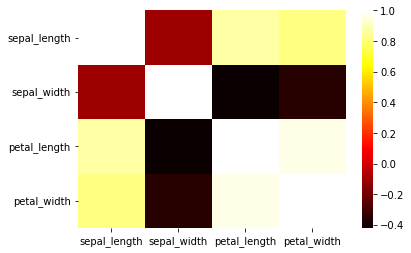

In [4]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = 'hot')

### Composite plots
It's often useful to present both catagorical plots and numeric plots together.  Seaborn's joint plot allows this.

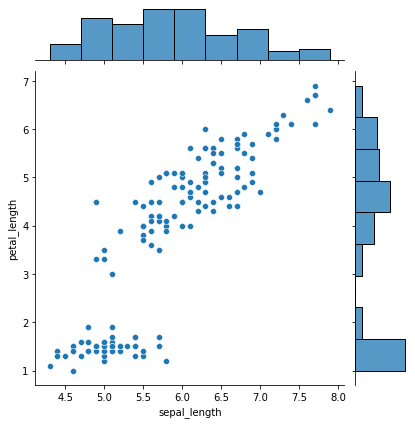

In [6]:
sns.jointplot(data=df, x="sepal_length", y="petal_length")

Adding colour to show species reveals the patterns in the data

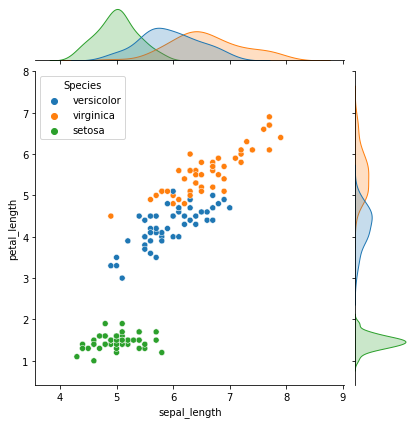

In [158]:
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

In [ ]:
Or bin the numerical data in a density plot

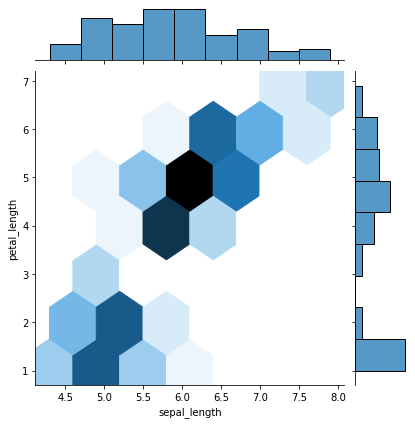

In [14]:
sns.jointplot(data=df, x="sepal_length", y="petal_length", kind="hex")

### Seaborn styles  
Seaborn has a number of default stypes which control the look of the plot

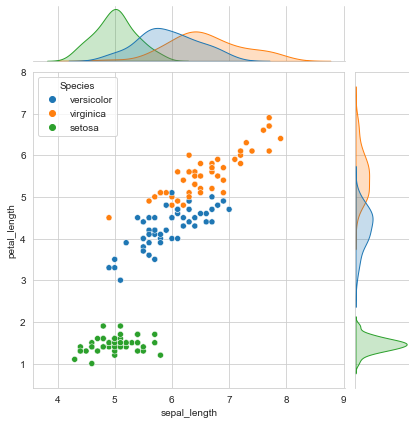

In [174]:
sns.set_style("whitegrid")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

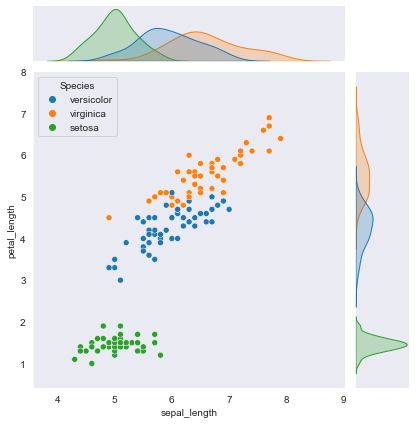

In [175]:
sns.set_style("dark")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

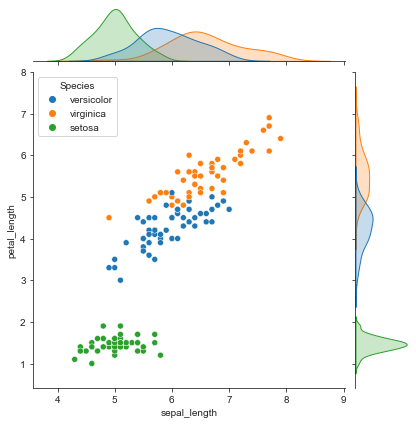

In [176]:
sns.set_style("ticks")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

Including some set of different types of presentation.

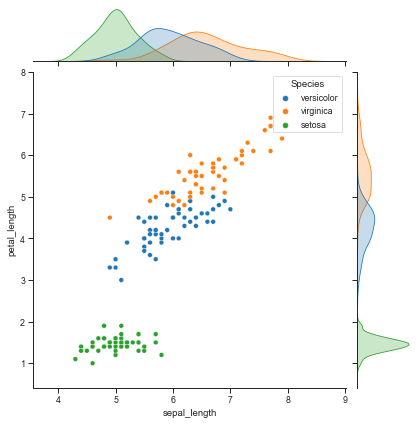

In [177]:
sns.set_context("paper")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

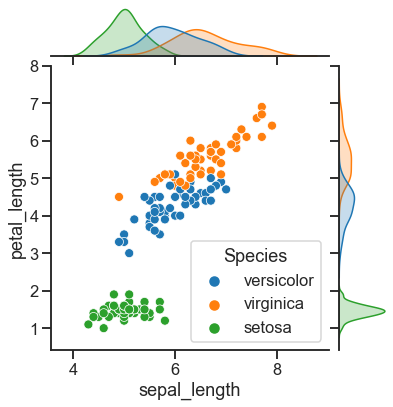

In [178]:
sns.set_context("talk")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

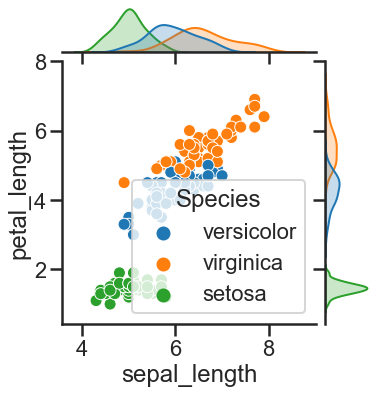

In [179]:
sns.set_context("poster")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

We need to move that legend box.

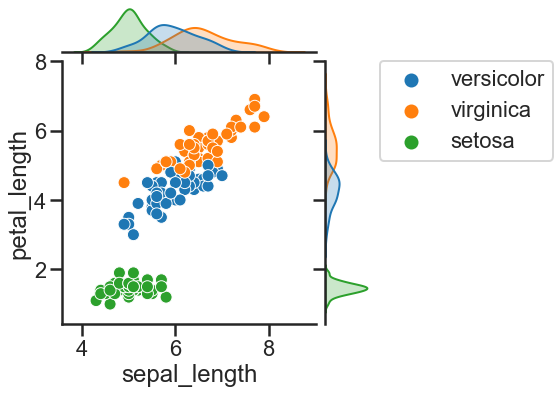

In [187]:
g = sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")
g.ax_joint.legend(bbox_to_anchor=(1.25,1), loc='upper left', borderaxespad=0)

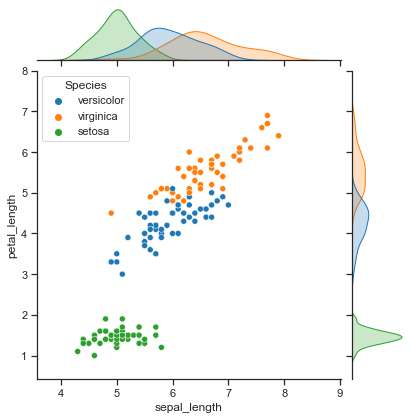

In [190]:
sns.set_context("notebook")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

### Seaborn colour palettes

Seaborn has six variations of matplotlib’s palette, called deep, muted, pastel, bright, dark, and colorblind. 

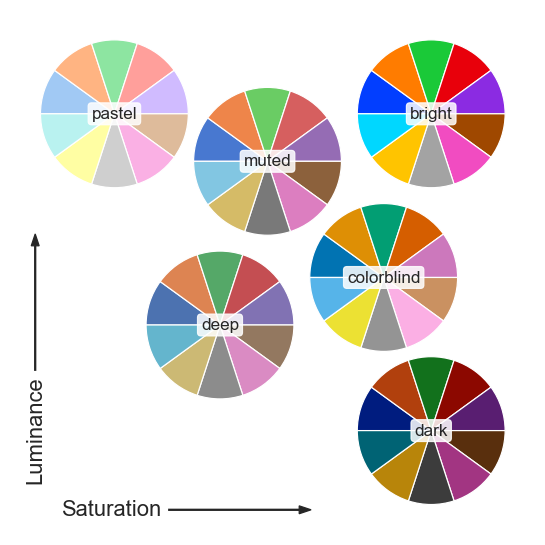

This is the current palette

In [15]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

We can specfiy a new one:

In [16]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [163]:
sns.set_palette('dark')

and re-do the last plot

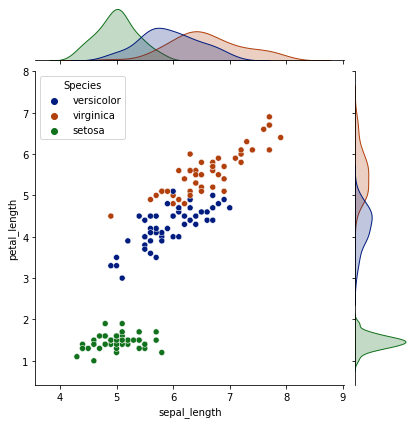

In [164]:
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

Here's the list of seaborn set palettes.  You can, of course customise your own palette.  There is lots more detail on this here: https://seaborn.pydata.org/tutorial/color_palettes.html   
tab10 is the default palette

 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


In [17]:
sns.color_palette("Accent")

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.4, 0.4, 0.4)]

In [18]:
sns.color_palette("magma")

[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

In [19]:
sns.color_palette("terrain")

[(0.011764705882352955, 0.5764705882352941, 0.9764705882352941),
 (0.1450980392156863, 0.8290196078431373, 0.42901960784313725),
 (0.7098039215686275, 0.9419607843137255, 0.5419607843137255),
 (0.8549019607843137, 0.8142745098039216, 0.5216470588235294),
 (0.5725490196078431, 0.45286274509803925, 0.36917647058823533),
 (0.7176470588235294, 0.6385882352941177, 0.6216470588235294)]

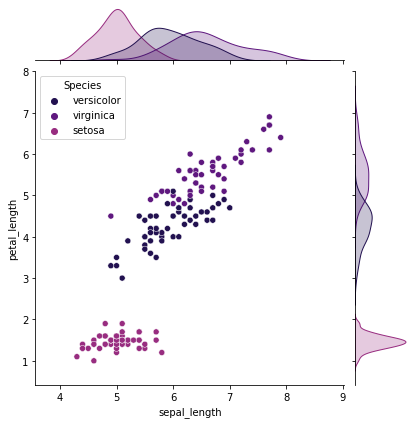

In [20]:
sns.set_palette("magma")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")